In [14]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [15]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Let's know about our dataset before proceeding further : Classification model

* The first column in our dataset is all about passenger Id which is from 1 to 891 which will not be helpful for us in predicting data as it is just a unique ID.

* Second column in our dataset represents if the passenger has beeen survived or not which is our target variable and in this colum 0 represents not survivd and 1 repersents as survived.

* Third column is Pclass which stands for passenger class and it defined whether that passenger has opt for 1st, 2nd or 3rd class of ticket.

* In fourth column we can see name of that particular customer which I think will not be usefull in predicting data rest we will see by our analysis.

* The fifth one is Sex column which defines gender of that pessenger and it is one of the important column for us as it will help us in predicting that either male or female has beeen rescued or survived more.

* Sixth column is Age whih defines age of that customer by which we will be able to predict that either child, young or old has been survived more or less.

* Seventh column is SibSp column which represents the number of siblings or relative a passenger had in the ship.  

* Eight column is parch which represents if the passenger is parent and his or her child isalso present in ship.

* Nineth one is ticket number which have a unique ticket number for all customer which I think will not be useful for predicting data rest we'll see through our analysis.

* Tenth one is all about Fare in which it is represented that how much the person have paid for his ticket.

* eleventh one is cabin which is defining that which cabin has been assigned to that particular customer in the ship as per cabin number.

* Twelveth is Embarked, this column defines that from where the customer have boarded for the ship.

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting survival and non survival rate.

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Here we can see last 5 rows of our dataset which shows the same thing as top 5 as it's a clasification model and in th8s negative and postive correlation an not be identified here.

In [17]:
df.shape

(891, 12)

In [ ]:
By the above function we can see that we are having 891 rows and 12 columns  in our dataset.

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here we can see that we have different types of data in our data set, that is int, object and float we'll see further if column having object is important for us and if it is important we'll change it into numeric type to fit them in our model.

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that e are having 687 null values in cabin column and 177 in age column, let's do treatment of this null values before moving forward. We'll fill mean value of our column in the null values of numeric column and we'll treat catagorical columns accordingly.

In [21]:
#Here we go
mean_value = df['Age'].mean()
df['Age'].fillna(mean_value, inplace=True)

Now let's fill "Null" in the missing values of catagorical data

In [22]:
df['Embarked'].fillna('Null', inplace=True)

In [23]:
df['Cabin'].fillna('Null', inplace=True)

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We can see that we have successfully treated all the null values of our dataset and now there is nu null value.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


By the above we can analys that we are not having any null value in our dataset now however we are having  columns with object datatype which needs to be treated accordingly.

<Axes: >

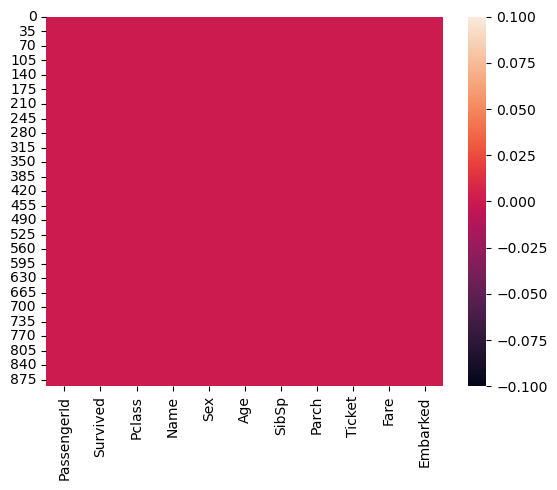

In [24]:
#Let's make a heatmap to analys null values of dataset after treting them.
sns.heatmap(df.isnull())

We can see that our graph is having maximum colour near to 0 this means we do not have any null value in our dataset, and it's ready to work with after checking outliers.

In [25]:
df.nunique().to_frame("Unique values")

,Unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


We can see we are having maximum unique values in numeric column which will be helpful in analysing data.

In [14]:
df.duplicated().sum()

0

By the above we can see that we do not have any duplicated column in our dataset and it is a good sign as we o not have to lose our data.

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above date.

* We can see that the count of all columns are same it means our data is perfect and ready to work with.
* We can see that there is not too much difference in mean and median of most of the column this means our data is not skewed it is just Fare column having mean greater than it's median which means it's right skewed and we'll have to treat it which we'll do further.
* By analysing the data we can see that there is difference between 75th percentile and maximum value this means we are having outliers in our dataset, ans will trest it further.
8 By analysing data we can see that PassegerID is not playing any role in survival so let us drop that column.

In [16]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


By the above fubnction we can analys that our data is not corelated too much with each other which means we do not have to face multicollenearity issue

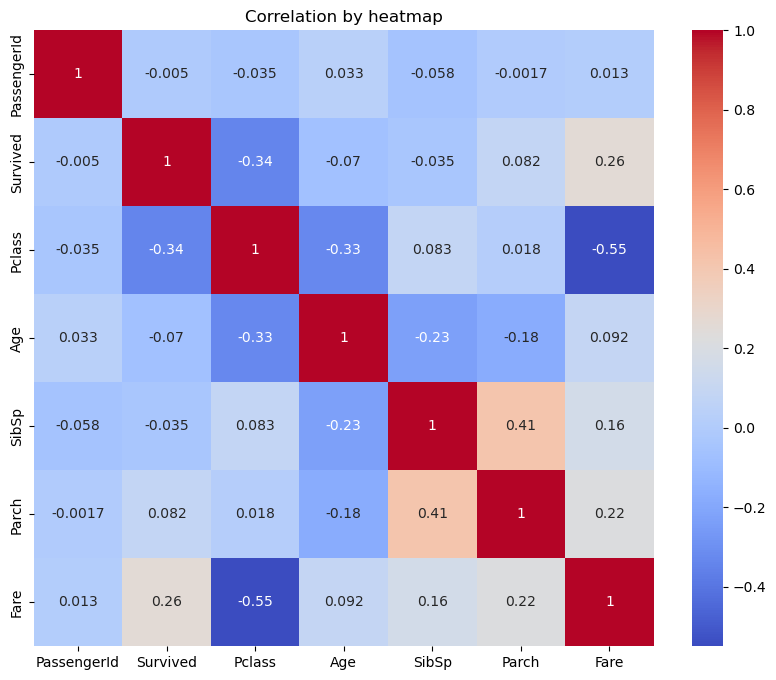

In [26]:
# let's also check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

we can see most of the boxes in blue box that means the data us not having multicollenearity issue.

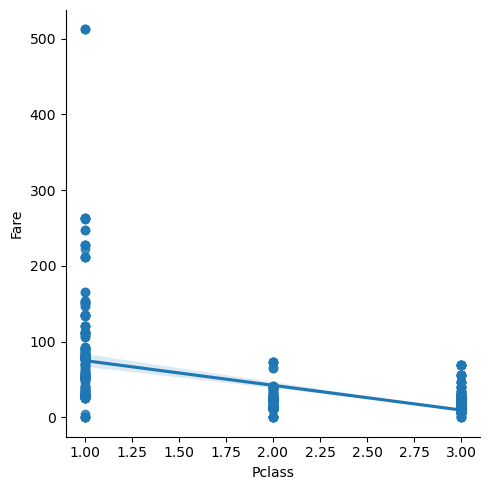

In [18]:
sns.lmplot(x='Pclass',y='Fare',data=df,palette='colorblind')

By the seperate plot also we can see that there is no high correlation between data.

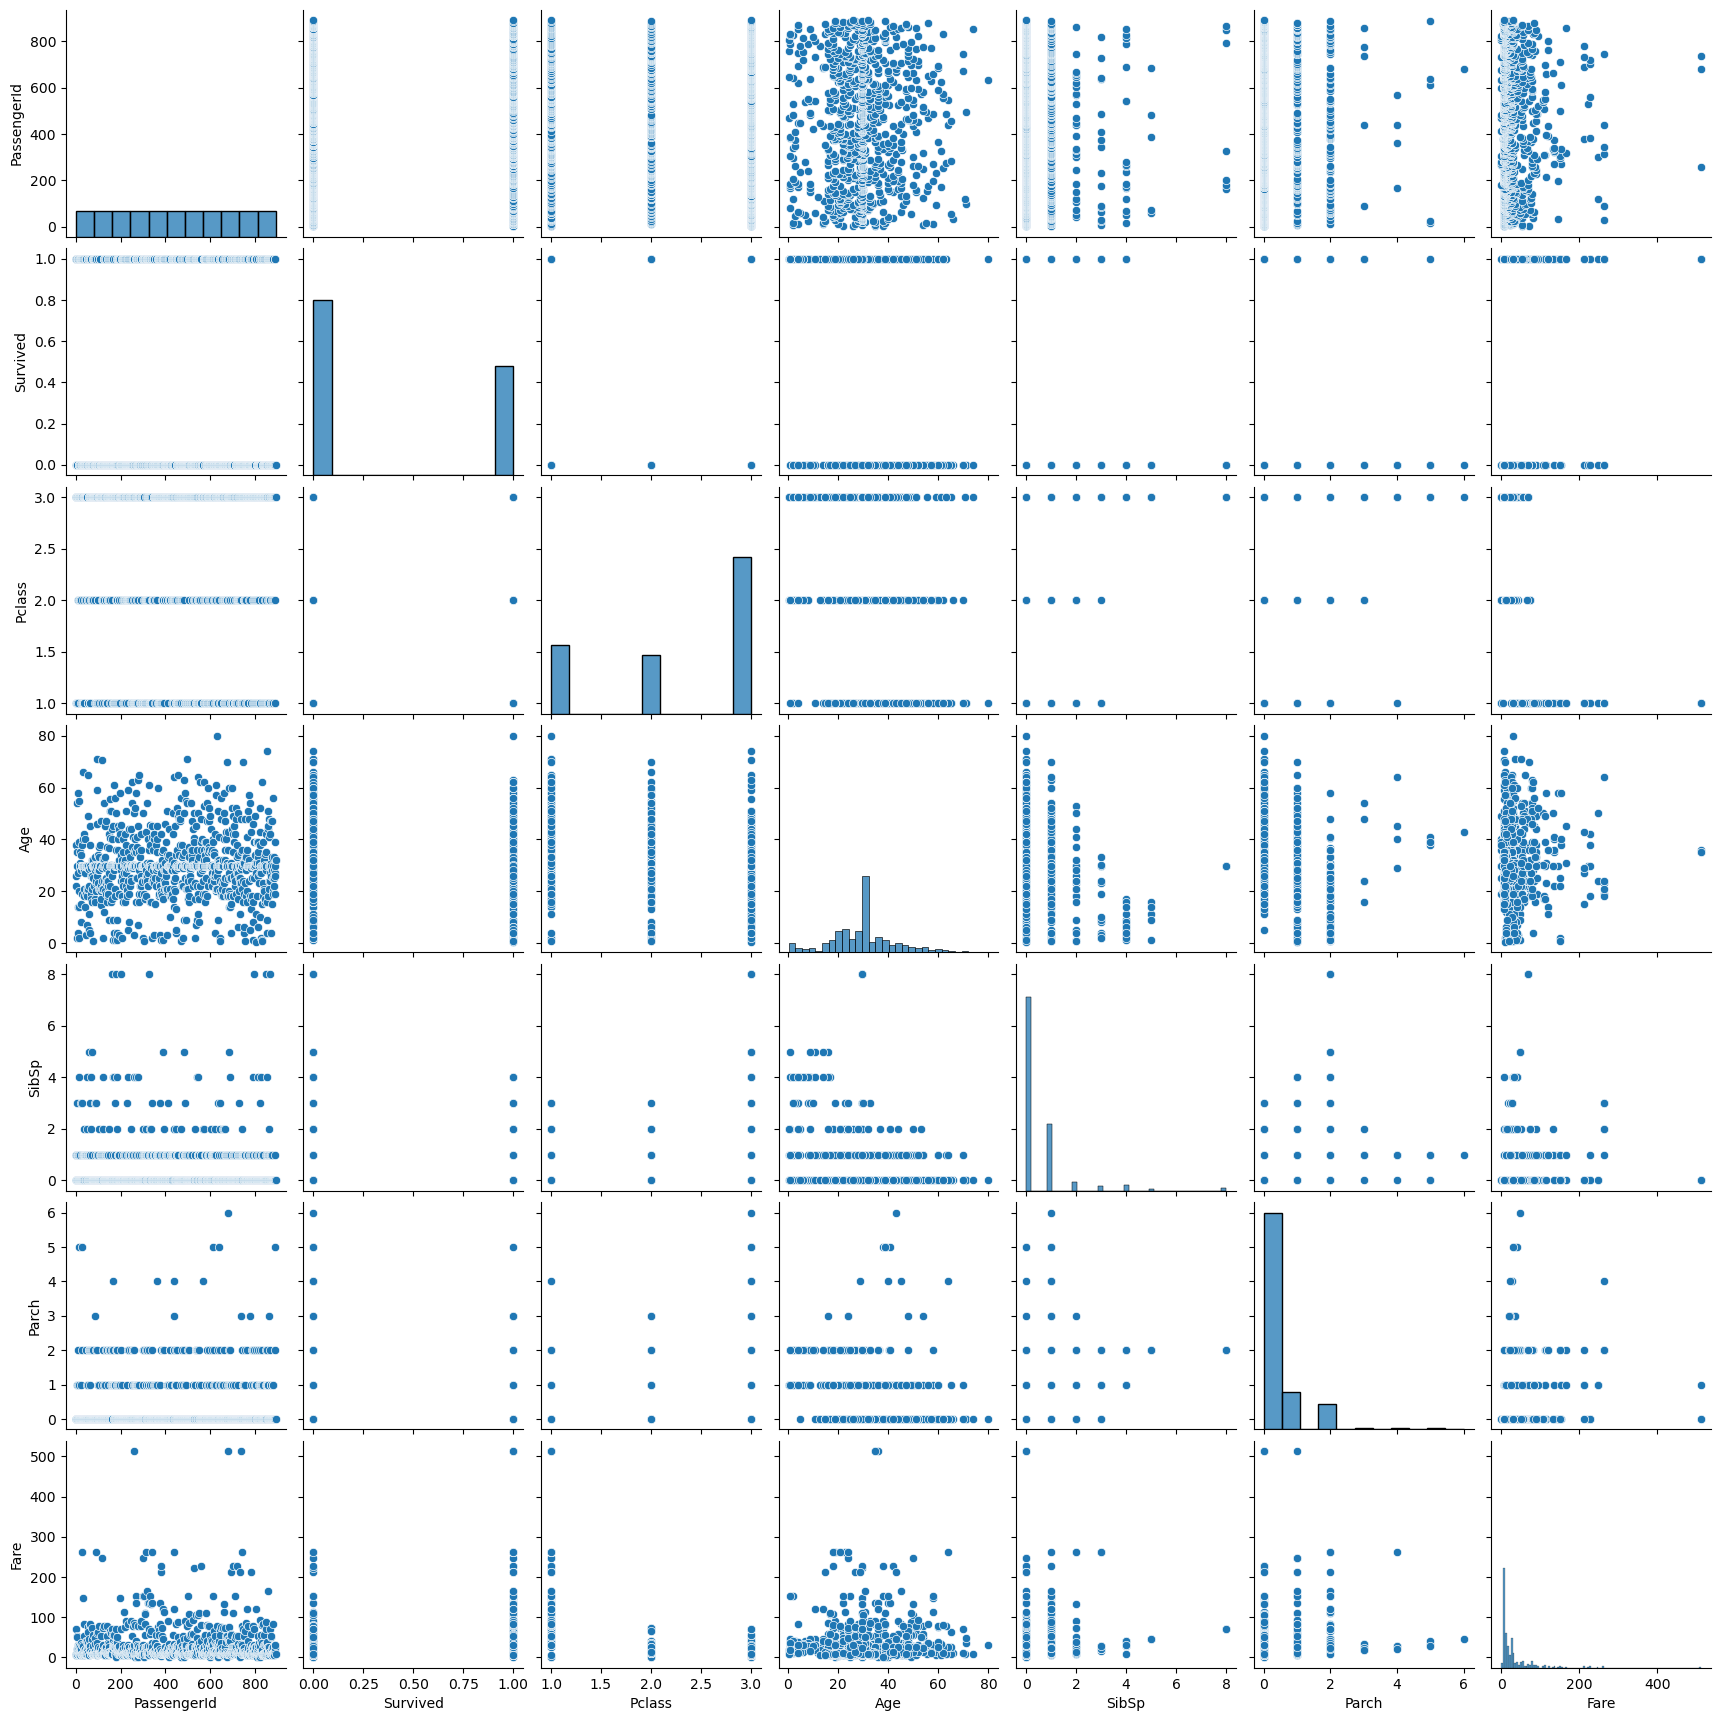

In [27]:
sns.pairplot(data=df,palette="dark1")

With the analysis of scatter plots we have got through this pair plot, we can say that 

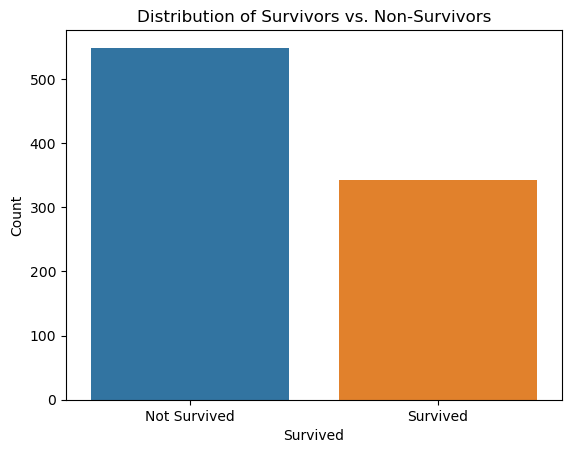

In [32]:
sns.countplot(data=df, x='Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survivors vs. Non-Survivors')
plt.xticks([0, 1], ['Not Survived', 'Survived'])  
plt.show()


By the above graph we can compare the data that how much total passenger has been survived and not survived.

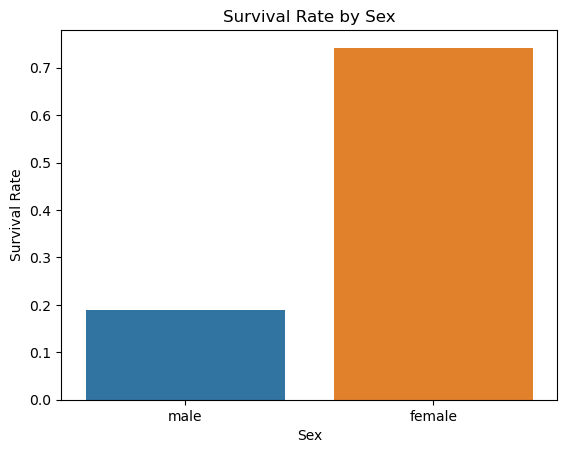

In [33]:
sns.barplot(data=df, x='Sex', y='Survived', ci=None)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

In [ ]:
With the help of above graph we can understand that number of female counts are to much high as a survived one than male.

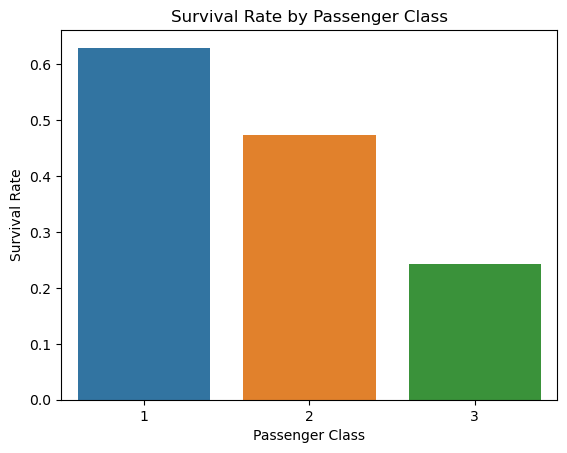

In [34]:
sns.barplot(data=df, x='Pclass', y='Survived', ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

# We can also analys that the persons who have taken 1st class ticket are having more survival rate than 2nd and third class an the survival rat is gradually decreasing from 1st class to 3rd class

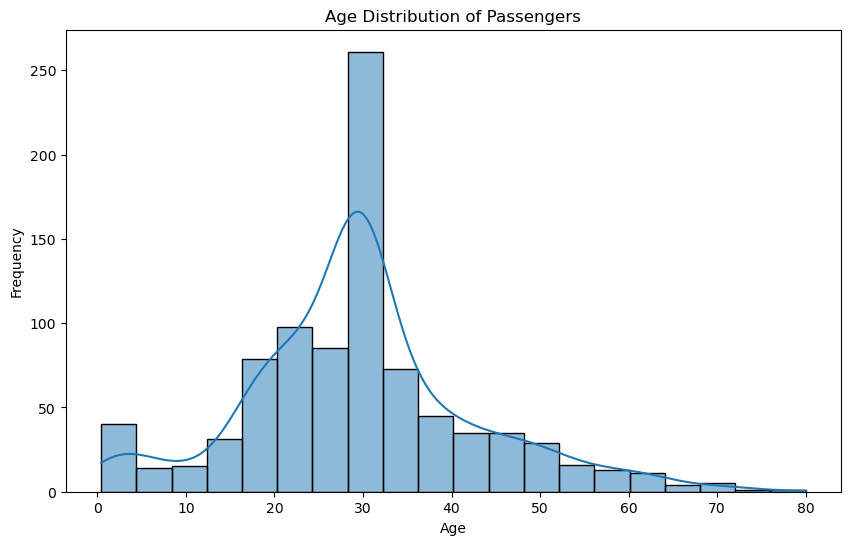

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')
plt.show()

With the help of abov distribution we got to know that there wee high number of passenger having age arounf 30, which means most of the passenger were young.

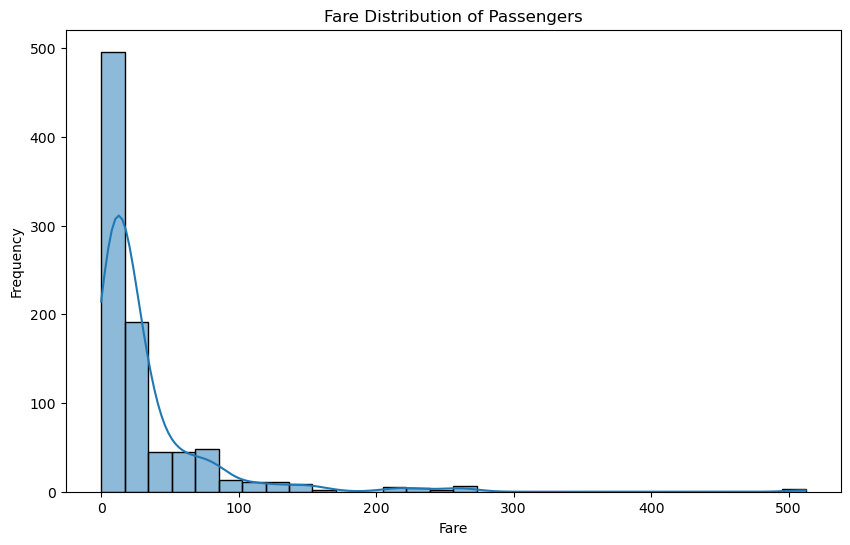

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=30, kde=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution of Passengers')
plt.show()

By the above distribution plot we can see that more passenger has paid high fare that means more passenger would have taken 1st class or upper class tickets

In [27]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'PassengerId'),
  Text(2, 0, 'Survived'),
  Text(3, 0, 'Pclass'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'SibSp'),
  Text(6, 0, 'Parch'),
  Text(7, 0, 'Fare')])

With the help of above boxplot we can see that we are having outliers in passenger ID, fare and age, which we'll treat further.

In [28]:
df.drop(columns=['PassengerId'],inplace=True)

Let's drop passenger Id column as it is not contributing in prediction of data in any ways.

In [29]:
#Let's find outlier with Zscore method
outliers=df[['Age','SibSp','Fare']]
z=np.abs(zscore(outliers))
z

,Age,SibSp,Fare
0,0.592481,0.432793,0.502445
1,0.638789,0.432793,0.786845
2,0.284663,0.474545,0.488854
3,0.407926,0.432793,0.420730
4,0.407926,0.474545,0.486337
...,...,...,...
886,0.207709,0.474545,0.386671
887,0.823344,0.474545,0.044381
888,0.000000,0.432793,0.176263
889,0.284663,0.474545,0.044381


In [30]:
np.where(z>3)

(array([ 16,  27,  50,  59,  68,  71,  88,  96, 116, 118, 119, 159, 164,
        171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311, 324, 341,
        377, 380, 386, 438, 480, 493, 527, 541, 542, 557, 630, 672, 679,
        683, 686, 689, 700, 716, 730, 737, 742, 745, 779, 787, 792, 813,
        824, 846, 850, 851, 863], dtype=int64),
 array([1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2,
        2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64))

Here we go- we've successfully detected outliers here let's removed them in next step

In [31]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now.

In [32]:
df1.shape

(834, 11)

we can see earlier we were having 891 rows however after rwemoving outliers we are only having 834 rows that means we have successfuly removed outliers without too much dataloss.

In [33]:
df1.skew()

Survived    0.458393
Pclass     -0.652927
Age         0.301548
SibSp       1.930324
Parch       3.274127
Fare        2.327490
dtype: float64

By the above we can see that skewness is present in our dataset which needs to be treated.

In [34]:
#Let's use cuberot methos to remove ouliers
df1['SibSp']=np.cbrt(df1['SibSp'])
df1['Parch']=np.cbrt(df1['Parch'])
df1['Fare']=np.cbrt(df1['Fare'])

In [35]:
df1.skew()

Survived    0.458393
Pclass     -0.652927
Age         0.301548
SibSp       0.978993
Parch       1.613240
Fare        0.689284
dtype: float64

We can se that we's successfully removed skewness from our data except Parch which still needs to be treated, let's check further or we will drop it as it is not contributing too much in our prediction which we've identified with above analysis.

In [36]:
df1['Parch']=np.square(df1['Parch'])

In [37]:
df1.skew()

Survived    0.458393
Pclass     -0.652927
Age         0.301548
SibSp       0.978993
Parch       2.172392
Fare        0.689284
dtype: float64

As we can see skewness of Parch is not treated we can also use log method here however as it is not contributing, it is better to drop it.

In [38]:
df1.drop(columns=['Parch'],inplace=True)

In [39]:
#Now let's convert important catagorical columns into numeric to make them use in machine learning model.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [40]:
df1['Sex'] = label_encoder.fit_transform(df1['Sex'])

In [41]:
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])

In [42]:
df1['Cabin'] = label_encoder.fit_transform(df1['Cabin'])

We've successfully changed imprtant catagorical columns into numeric, now let's go ahead and drop unneccesary columns not contributing in training.

In [49]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,7.2500,Null,3
1,2,1,1,0,38.0,1,71.2833,C85,0
2,3,1,3,0,26.0,0,7.9250,Null,3
3,4,1,1,0,35.0,1,53.1000,C123,3
4,5,0,3,1,35.0,0,8.0500,Null,3


In [43]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['Pclass', 'Sex','Age', 'SibSp','Fare', 'Embarked','Cabin']
target = 'Survived'

In [44]:
x = df1[features]
y = df1[target]

In [45]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (834, 7)
dimension of dependent variable: (834,)


We can see that we are having same number of rows that is 834 and 7 columns in indpendent variable wich means we are going good and can perform tarining and prediction.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu= 0
mxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS = i
print("Max accuracy is :" , maxAccu, "at random_state:", maxRS)

Max accuracy is : 0.8645418326693227 at random_state: 179


we can see that the Maximum accuracy is 86 at random state 179

In [49]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [51]:
#let's import neccesarry libraries

from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.852589641434263
[[142  18]
 [ 19  72]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       160
           1       0.80      0.79      0.80        91

    accuracy                           0.85       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.85      0.85      0.85       251



In [56]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.848605577689243
[[141  19]
 [ 19  72]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       160
           1       0.79      0.79      0.79        91

    accuracy                           0.85       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.85      0.85      0.85       251



In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8605577689243028
[[144  16]
 [ 19  72]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       160
           1       0.82      0.79      0.80        91

    accuracy                           0.86       251
   macro avg       0.85      0.85      0.85       251
weighted avg       0.86      0.86      0.86       251



In [58]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8247011952191236
[[135  25]
 [ 19  72]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       160
           1       0.74      0.79      0.77        91

    accuracy                           0.82       251
   macro avg       0.81      0.82      0.81       251
weighted avg       0.83      0.82      0.83       251



In [59]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.848605577689243
[[141  19]
 [ 19  72]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       160
           1       0.79      0.79      0.79        91

    accuracy                           0.85       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.85      0.85      0.85       251



In [61]:
from sklearn.model_selection import cross_val_score

In [65]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,pred_rfc)-score.mean()*100))

[0.76646707 0.81437126 0.84431138 0.78443114 0.8313253 ]
0.8081812279056345
Difference between Accuracy score and cross validation score is : -79.94959689414911


In [67]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.73652695 0.79041916 0.83832335 0.78443114 0.84337349]
0.7986148185556597
Difference between Accuracy score and cross validation score is : -79.01287627787673


In [68]:
score = cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predgbc)-score.mean()*100))

[0.76646707 0.81437126 0.8742515  0.79041916 0.81927711]
0.8129572180939327
Difference between Accuracy score and cross validation score is : -80.43516404046896


In [69]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[0.76047904 0.82634731 0.80239521 0.78443114 0.81927711]
0.7985859606089026
Difference between Accuracy score and cross validation score is : -79.03389486567114


In [70]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[0.77844311 0.83832335 0.83832335 0.78443114 0.8373494 ]
0.8153740711348387
Difference between Accuracy score and cross validation score is : -80.68880153579464


We can see that bagging classifier is our best model as it is having least difference between actual and cross validation's accuracy

# Let's do Hyper parameter tunning by Gridsearch

In [71]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters={'creiterion' : ['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [78]:
GCV=GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [79]:
GCV.fit(x_train,y_train)

ValueError: Invalid parameter 'creiterion' for estimator BaggingClassifier(). Valid parameters are: ['base_estimator', 'bootstrap', 'bootstrap_features', 'estimator', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

Let's finalize that Bagging classifier is our best model as it have less difference between actual and cross validation accuracy

Now let's save our model by pickle method

In [82]:
import pickle
filename='Titanic.pkl'
pickle.dump(bc,open(filename,'wb'))

We've already saved our work with above code let's reopen the model and check accuracy score

In [83]:
Load_model=pickle.load(open('Titanic.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

84.86055776892431


# Thank you